# KNN

In [2]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import euclidean
from scipy import stats
from matplotlib import pyplot as plt

## Roadmap
1. Calculate all distancies between known and unknown points
2. Predict class of unknown point by the k nearest neighbours



In [3]:
def calc_all_distancies(data_x, unknown):
    '''
        Function calculates distancies between each pairs of known and unknown points
    '''
    num_pred = unknown.shape[0]
    num_data = data_x.shape[0]
    dists = np.zeros((num_pred, num_data))
    for i in range(num_pred):
        for j in range(num_data):
            dists[i,j] = euclidean(unknown[i],data_x[j])
    return dists

In [4]:
def predict(dists, data_y, k):
    '''
        Function predicts the class of the unknown point by the k nearest neighbours
    '''
    num_pred = dists.shape[0]
    y_pred = np.zeros(num_pred)
    for j in range(num_pred):
        dst = dists[j]
        closest_x = np.argsort(dst)
        x_k = closest_x[:k]
        closest_y = data_y[x_k]
        y_pred[j] = stats.mode(closest_y,None).mode
    return y_pred

In [5]:
def accuracy(predicted,real):
    '''
        Calculates accuracy percentage
    '''
    ind = predicted == real
    l = len(ind)
    s = sum(ind)
    return 100*s/l
    

In [6]:
def compare_k(data_x, data_y, test_x, test_y, kmin=1, kmax=50, kstep=4):
    '''
        Main comparing function
    '''
    k = list(range(kmin, kmax, kstep))
    steps = len(k)
    features = np.zeros((steps,3))
    
    print('Evaluating distancies started')
    
    t0 = time.time()
    distancies = calc_all_distancies(data_x,test_x)
    miss = []
    t = time.time()
    s1 = data_x.shape[0]
    s2 = test_x.shape[0]
    
    print('Distancies completed in %d seconds for %dx%d' %(t-t0,s1,s2))
    
    for j in range(steps):
        t0 = time.time()
        yk = predict(distancies,data_y,k[j])
        t = time.time() - t0
        features[j][0] = k[j]
        features[j][1] = accuracy(yk,test_y)
        features[j][2] = t
        cond = yk!=test_y
        miss.append({
            'k':k[j],
            'acc':features[j][1],
            'x':test_x[cond]}
        )
        
        print('k={0}, accuracy = {1}%, time = {2} sec'.format(k[j],features[j][1],features[j][2]))
        
    return features, miss

In [7]:
num_observations = 300
x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([-2, 3], [[2, .75], [.75, 2]], num_observations)


X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
               np.ones(num_observations)))



## Select some part of data to be tested

(106, 2)


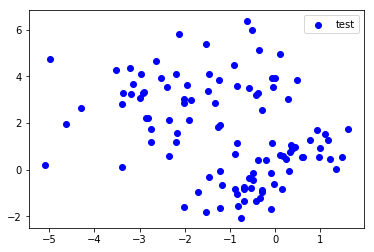

In [11]:
l = len(X)
train_ind = np.ones(l, dtype=bool)
test_part = 0.20
train_ind[np.unique(np.random.randint(1, l, int(test_part * l)))] = False
test_ind = np.logical_not(train_ind)

x_trn = X[train_ind]
y_trn = Y[train_ind]
x_tst = X[test_ind]
y_tst = Y[test_ind]
print(x_tst.shape)
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')
plt.show()

## Calculate distancies & compare result for different k

In [9]:
res, ms = compare_k(x_trn, y_trn, x_tst, y_tst,1,201,20)

Evaluating distancies started
Distancies completed in 0 seconds for 492x108
k=1, accuracy = 98.14814814814815%, time = 0.008555889129638672 sec
k=21, accuracy = 99.07407407407408%, time = 0.008747100830078125 sec
k=41, accuracy = 99.07407407407408%, time = 0.008994102478027344 sec
k=61, accuracy = 99.07407407407408%, time = 0.00930476188659668 sec
k=81, accuracy = 99.07407407407408%, time = 0.009564876556396484 sec
k=101, accuracy = 99.07407407407408%, time = 0.010875225067138672 sec
k=121, accuracy = 99.07407407407408%, time = 0.012551069259643555 sec
k=141, accuracy = 99.07407407407408%, time = 0.010701894760131836 sec
k=161, accuracy = 99.07407407407408%, time = 0.009885787963867188 sec
k=181, accuracy = 98.14814814814815%, time = 0.010035991668701172 sec


## Visualisation

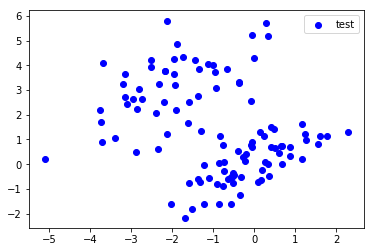

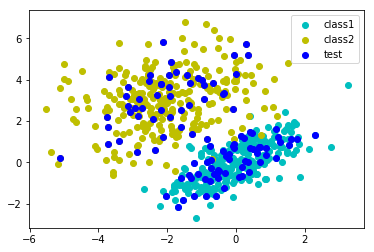

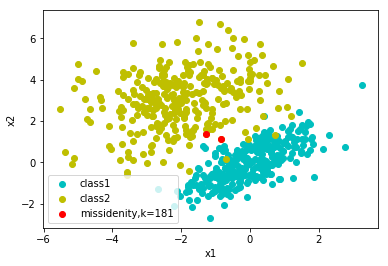

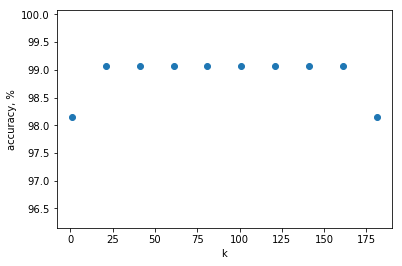

In [10]:
# initial data
fig = plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c',label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y',label='class2')
# randomly selected data
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')


# missidentifies for k = value
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c', label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y', label='class2')
plt.scatter(ms[-1]['x'][:,0],ms[-1]['x'][:,1],color='r',label='missidenity,k=%d'%ms[-1]['k'])
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.figure()

# accuracy plot
k = plt.scatter(res[:, 0], res[:, 1])
plt.ylim(min(res[:, 1]) - 2, max(res[:, 1])+1, 4)
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()